<a href="https://colab.research.google.com/github/aarondelgiudice/thinkful_data_bootcamp/blob/master/unit_4/capstone/4_5c_model_selection_supervised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# My Fellow Citizens:
#### Natural Language Processing Model of Inaugural Addresses

### Table of Contents
1. Preprocessing
    - Import Data and Packages
    - EDA
    - Feature Engineering
    - Clean Data
    - Parse Data
2. Feature Extraction
    - Bag of Words
    - Tf-idf
3. Model Selection
    - Split Test/Training Data
    - Clustering
        - K-Means
        - Mean Shift
        - Spectral Clustering
        - Affinity Propagation
    - Supervised Learning
        - L1/l2 Regression
        - Random Forest
        - Support Vector Machine
    - Assessment
4. Model Tuning
    - Dimensionality Reduction
    - Supervised/Unsupervised Model Comparrison
5. Conclusion

### Import data and packages

In [0]:
# load packages
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")

#from sklearn.metrics import silhouette_score
#from sklearn.model_selection import cross_val_score

In [2]:
filename = 'inaugural'
df_prez = pd.read_csv(filename+".csv", index_col=0)
df_prez.head()

,fileid,target,era,year,president,party,recession,wartime,text_raw,length_raw,text_clean,length_clean,text_parsed,length_parsed,text_nostops,length_nostops
0,1789-Washington.txt,NaN,founding,1789,washington,federalist,0,0,Fellow-Citizens of the Senate and of the House...,8619,fellow citizens of the senate and of the house...,8427,"['fellow', 'citizen', 'of', 'the', 'senate', '...",1394,"['fellow', 'citizen', 'senate', 'house', 'repr...",579
1,1793-Washington.txt,NaN,founding,1793,washington,federalist,0,0,"Fellow citizens, I am again called upon by the...",791,fellow citizens am again called upon by the vo...,763,"['fellow', 'citizen', 'be', 'again', 'call', '...",129,"['fellow', 'citizen', 'call', 'voice', 'countr...",56
2,1797-Adams.txt,NaN,founding,1797,adams,federalist,0,0,"When it was first perceived, in early times, t...",13877,when it was first perceived in early times tha...,13473,"['when', '-PRON-', 'be', 'first', 'perceive', ...",2257,"['perceive', 'early', 'time', 'middle', 'cours...",976
3,1801-Jefferson.txt,NaN,founding,1801,jefferson,democratic-republican,0,0,Friends and Fellow Citizens:\n\nCalled upon to...,10137,friends and fellow citizens called upon to und...,9835,"['friend', 'and', 'fellow', 'citizen', 'call',...",1688,"['friend', 'fellow', 'citizen', 'call', 'under...",723
4,1805-Jefferson.txt,NaN,founding,1805,jefferson,democratic-republican,0,0,"Proceeding, fellow citizens, to that qualifica...",12908,proceeding fellow citizens to that qualificati...,12598,"['proceed', 'fellow', 'citizen', 'to', 'that',...",2128,"['proceed', 'fellow', 'citizen', 'qualificatio...",902


In [3]:
filename = 'inaugural_word_counts'
word_counts = pd.read_csv(filename+".csv", index_col=0)
word_counts.head()

,fileid,text_nostops,government,people,nation,state,great,country,world,power,shall,citizen,time,law,right,peace,good,new,man,american,public,america,duty,constitution,war,free,interest,freedom,united,union,life,year,hope,national,principle,know,let,fellow,work,spirit,...,scope,relative,faction,occasionally,widen,dependence,abolish,columbia,fullness,overcome,probably,uniform,betray,monarchy,complain,potent,strange,mischief,minister,corner,absence,clothe,joint,prudent,accession,inform,temple,annual,asia,levy,economical,rightfully,consume,opening,unmindful,active,sorrow,furnace,justification,channel
0,1789-Washington.txt,"['fellow', 'citizen', 'senate', 'house', 'repr...",9,4,3,2,4,5,1,2,3,5,1,0,2,0,3,1,1,2,6,0,5,1,0,2,1,0,4,2,1,1,2,1,1,0,0,3,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1793-Washington.txt,"['fellow', 'citizen', 'call', 'voice', 'countr...",1,1,0,0,0,1,0,0,3,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1797-Adams.txt,"['perceive', 'early', 'time', 'middle', 'cours...",18,20,20,12,5,10,3,6,4,6,3,2,2,5,7,1,4,3,6,5,3,9,1,2,4,0,3,2,2,5,1,4,3,0,0,3,0,6,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1801-Jefferson.txt,"['friend', 'fellow', 'citizen', 'call', 'under...",13,2,4,3,4,4,3,5,6,7,0,4,6,5,8,0,9,0,4,0,2,2,1,3,0,4,0,2,1,0,2,0,9,1,7,7,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1805-Jefferson.txt,"['proceed', 'fellow', 'citizen', 'qualificatio...",3,0,6,12,1,5,2,4,7,10,6,6,4,4,4,1,3,1,14,0,8,6,4,1,8,2,1,3,2,4,0,0,4,2,2,8,1,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
filename = 'inaugural_tf_idf'
tf_idf = pd.read_csv(filename+".csv", index_col=0)
tf_idf.head()

,fileid,text_nostops,abandon,abandonment,abide,ability,able,abode,abolish,aboriginal,abound,abraham,abreast,abroad,absence,absent,absolute,absolutely,absorb,abstain,abundance,abundant,abundantly,abuse,accept,acceptance,access,accessible,accession,accident,accommodation,accompany,accomplish,accomplishment,accord,accordance,accordingly,account,accountability,accountable,...,wind,window,winter,wipe,wise,wisely,wish,withdraw,wither,withhold,witness,woman,womanhood,wonder,wonderful,word,worker,workingman,worldly,worldwide,worship,worth,worthily,worthy,wound,wrest,writ,write,writer,wrong,yearn,yes,yesterday,yield,yorktown,young,youth,zeal,zealous,zealously
0,1789-Washington.txt,"['fellow', 'citizen', 'senate', 'house', 'repr...",0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.033835,0.0,0.000000,0.0,0.06622,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.061866,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1,1793-Washington.txt,"['fellow', 'citizen', 'call', 'voice', 'countr...",0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.163159,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
2,1797-Adams.txt,"['perceive', 'early', 'time', 'middle', 'cours...",0.030996,0.0,0.0,0.0,0.000000,0.0,0.0,0.040534,0.0,0.0,0.0,0.026315,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.029231,0.0,0.0,0.0,0.0,0.0,0.049085,0.0,0.0,0.000000,0.0,0.029231,0.0,0.00000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.022929,0.0,0.067335,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.035532,0.0,0.0
3,1801-Jefferson.txt,"['friend', 'fellow', 'citizen', 'call', 'under...",0.040103,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.034046,0.0,0.0,0.045972,0.0,0.0,0.0,0.0,0.0,0.0,0.075637,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.037819,0.0,0.00000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.029665,0.0,0.029039,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.052443,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.035821,0.0,0.059331,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.045972,0.0,0.0
4,1805-Jefferson.txt,"['proceed', 'fellow', 'citizen', 'qualificatio...",0.000000,0.0,0.0,0.0,0.030152,0.0,0.0,0.041811,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.060303,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.030152,0.0,0.00000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.023152,0.0,0.0,0.0,0.087991,0.0,0.0,0.0,0.000000,0.023651,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028559,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.109956,0.0,0.0


In [0]:
# set data for modeling
Data_bow = word_counts.drop(['fileid', 'text_nostops'], 1)
Data_tfidf = tf_idf.drop(['fileid', 'text_nostops'], 1)
df = pd.concat([word_counts, tf_idf.drop(['fileid', 'text_nostops'], axis=1)], axis=1)
Data = df.drop(['fileid', 'text_nostops'], axis=1)

## Supervised Models

In [0]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [0]:
# define dataframes to store results
df_desc = pd.DataFrame()
df_score = pd.DataFrame()

# define supervised modeling function
def supervised_clf(model, data, target, test_size=0.25, stratify=None, cv=5):
  """
  """
  from sklearn.model_selection import train_test_split, cross_val_score
  
  X_train, X_test, y_train, y_test = train_test_split(
      data, target, test_size=test_size, stratify=stratify, random_state=42)
  
  model = model.fit(X_train, y_train)
  train_score = model.score(X_train, y_train)
  test_score = model.score(X_test, y_test)
  print('\nTraining score:', train_score)
  print('\nValidation score:', test_score)
  
  cv_scores = cross_val_score(model, data, target, cv=cv)
  cv_score = np.round(np.mean(cv_scores)*100, 4)
  variance = np.round(np.var(cv_scores)*100, 4)
  print('\nCross validation: {} +/- {}%'.format(cv_score, variance))
  
  return pd.DataFrame([[train_score, test_score, cv_score, variance]],
                      columns=["train_score", "test_score", "cv_score", "variance"])

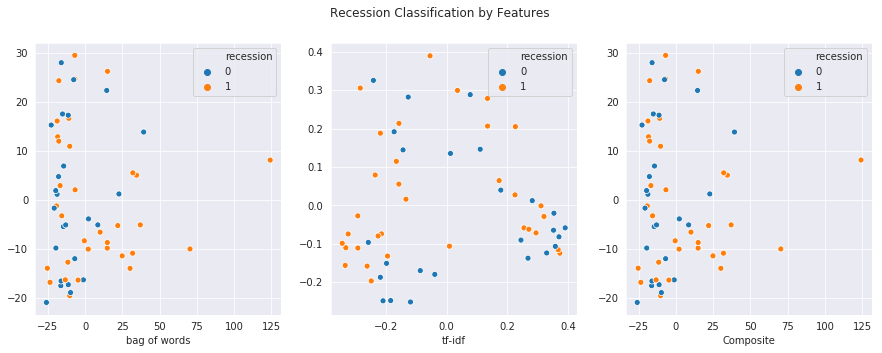

In [8]:
from sklearn.decomposition import PCA
# reduce data to two dimensions
bow_2D = PCA(n_components=2).fit_transform(Data_bow)
tfidf_2D = PCA(n_components=2).fit_transform(Data_tfidf)
data_2D = PCA(n_components=2).fit_transform(Data)

data_list = [bow_2D, tfidf_2D, data_2D]
labels_list = [df_prez['recession'], df_prez['recession'], df_prez['recession']]

def plotting_func(labels_list, data_list=[], num_plots=3, title="placeholder"):
  """
  """
  num_plots = range(0,num_plots)
  
  # plot target variable
  fig, axes = plt.subplots(1, len(num_plots), figsize=(15,5))

  sns.scatterplot(data_list[0][:,0], data_list[0][:,1],
                  hue=labels_list[0], ax=axes[num_plots[0]])
  axes[0].set_xlabel("bag of words")

  sns.scatterplot(data_list[1][:,0], data_list[1][:,1],
                  hue=labels_list[1], ax=axes[num_plots[1]])
  axes[1].set_xlabel("tf-idf")

  sns.scatterplot(data_list[-1][:,0], data_list[-1][:,1],
                  hue=labels_list[-1], ax=axes[num_plots[-1]])
  axes[2].set_xlabel("Composite")

  fig.suptitle(title+" Classification by Features")
  plt.show;
  
# plot recession target variable
plotting_func(labels_list, data_list, 3, "Recession")

### Modeling Recessions

#### Naive Bayes

In [9]:
#from sklearn.naive_bayes import GaussianNB
bayes = GaussianNB()
pred_bow = bayes.fit(Data_bow, df_prez['recession']).predict(Data_bow)

df_desc = df_desc.append(pd.DataFrame([["recession", "bag of words", "naive bayes"]],
                                      columns=["target", "features", "model"]),
                        ignore_index=True)
print("Target: {}\nFeatures: {}\nModel: {}\n".format(
    df_desc["target"].iloc[-1], df_desc["features"].iloc[-1], df_desc["model"].iloc[-1]))
df_score = df_score.append(supervised_clf(model=bayes,
                                          data=Data_bow,
                                          target=df_prez['recession'],
                                          stratify=df_prez['recession']),
                          ignore_index=True)

Target: recession
Features: bag of words
Model: naive bayes


Training score: 1.0

Validation score: 0.6

Cross validation: 58.6364 +/- 0.3618%


In [10]:
pred_tfidf = bayes.fit(Data_tfidf, df_prez['recession']).predict(Data_tfidf)

df_desc = df_desc.append(pd.DataFrame([["recession", "tf-idf", "naive bayes"]],
                                      columns=["target", "features", "model"]),
                        ignore_index=True)
print("Target: {}\nFeatures: {}\nModel: {}\n".format(
    df_desc["target"].iloc[-1], df_desc["features"].iloc[-1], df_desc["model"].iloc[-1]))
df_score = df_score.append(supervised_clf(model=bayes,
                                          data=Data_tfidf,
                                          target=df_prez['recession'],
                                          stratify=df_prez['recession']),
                          ignore_index=True)

Target: recession
Features: tf-idf
Model: naive bayes


Training score: 1.0

Validation score: 0.5333333333333333

Cross validation: 55.0 +/- 0.2493%


In [11]:
pred_data = bayes.fit(Data, df_prez['recession']).predict(Data)

df_desc = df_desc.append(pd.DataFrame([["recession", "composite", "naive bayes"]],
                                      columns=["target", "features", "model"]),
                        ignore_index=True)
print("Target: {}\nFeatures: {}\nModel: {}\n".format(
    df_desc["target"].iloc[-1], df_desc["features"].iloc[-1], df_desc["model"].iloc[-1]))
df_score = df_score.append(supervised_clf(model=bayes,
                                          data=Data,
                                          target=df_prez['recession'],
                                          stratify=df_prez['recession']),
                          ignore_index=True)

Target: recession
Features: composite
Model: naive bayes


Training score: 1.0

Validation score: 0.5333333333333333

Cross validation: 56.9697 +/- 0.2052%


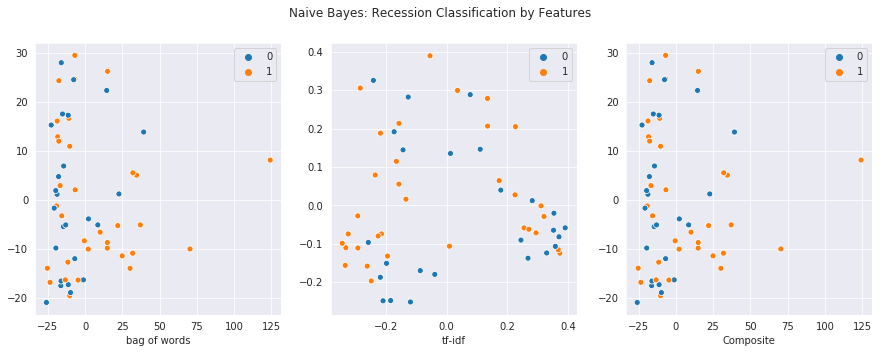

In [12]:
pred_bow = bayes.fit(Data_bow, df_prez['recession']).predict(Data_bow)
pred_tfidf = bayes.fit(Data_tfidf, df_prez['recession']).predict(Data_tfidf)
pred_data = bayes.fit(Data, df_prez['recession']).predict(Data)
labels_list = [pred_bow, pred_tfidf, pred_data]

plotting_func(labels_list, data_list, 3, "Naive Bayes: Recession")

#### L1 Regularization

In [13]:
#from sklearn.linear_model import LogisticRegression
# set penalty to 'l1'
# set penalty to 'saga'
lasso = LogisticRegression(penalty='l1',
                           solver='saga',
                           multi_class='auto',
                           random_state=42,
                           #max_iter=1500
                          )
df_desc = df_desc.append(pd.DataFrame([["recession", "bag of words", "lasso regression"]],
                                      columns=["target", "features", "model"]),
                        ignore_index=True)
print("Target: {}\nFeatures: {}\nModel: {}\n".format(
    df_desc["target"].iloc[-1], df_desc["features"].iloc[-1], df_desc["model"].iloc[-1]))
df_score = df_score.append(supervised_clf(model=lasso,
                                          data=Data_bow,
                                          target=df_prez['recession'],
                                          stratify=df_prez['recession']),
                          ignore_index=True)

Target: recession
Features: bag of words
Model: lasso regression



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)



Training score: 0.9767441860465116

Validation score: 0.6


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)



Cross validation: 51.8182 +/- 0.6579%


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [14]:
df_desc = df_desc.append(pd.DataFrame([["recession", "tf-idf", "lasso regression"]],
                                      columns=["target", "features", "model"]),
                        ignore_index=True)
print("Target: {}\nFeatures: {}\nModel: {}\n".format(
    df_desc["target"].iloc[-1], df_desc["features"].iloc[-1], df_desc["model"].iloc[-1]))
df_score = df_score.append(supervised_clf(model=lasso,
                                          data=Data_tfidf,
                                          target=df_prez['recession'],
                                          stratify=df_prez['recession']),
                          ignore_index=True)

Target: recession
Features: tf-idf
Model: lasso regression


Training score: 0.5581395348837209

Validation score: 0.6

Cross validation: 56.8182 +/- 0.0344%


In [15]:
df_desc = df_desc.append(pd.DataFrame([["recession", "composite", "lasso regression"]],
                                      columns=["target", "features", "model"]),
                        ignore_index=True)
print("Target: {}\nFeatures: {}\nModel: {}\n".format(
    df_desc["target"].iloc[-1], df_desc["features"].iloc[-1], df_desc["model"].iloc[-1]))
df_score = df_score.append(supervised_clf(model=lasso,
                                          data=Data,
                                          target=df_prez['recession'],
                                          stratify=df_prez['recession']),
                          ignore_index=True)

Target: recession
Features: composite
Model: lasso regression



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)



Training score: 0.9767441860465116

Validation score: 0.6


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)



Cross validation: 51.8182 +/- 0.6579%


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


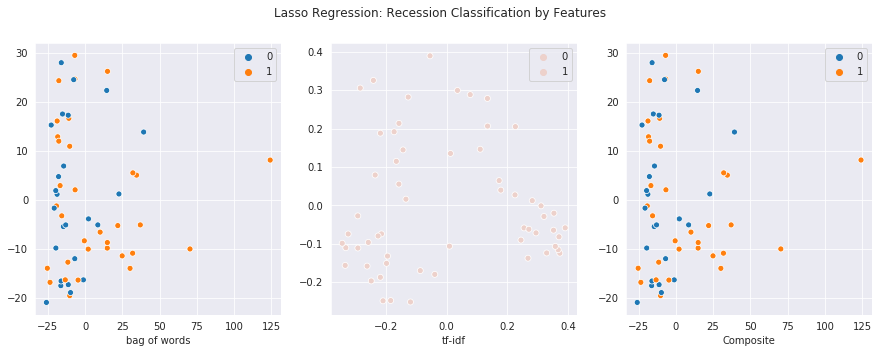

In [16]:
pred_bow = lasso.fit(Data_bow, df_prez['recession']).predict(Data_bow)
pred_tfidf = lasso.fit(Data_tfidf, df_prez['recession']).predict(Data_tfidf)
pred_data = lasso.fit(Data, df_prez['recession']).predict(Data)
labels_list = [pred_bow, pred_tfidf, pred_data]

plotting_func(labels_list, data_list, 3, "Lasso Regression: Recession")

#### L2 Regularization

In [17]:
#from sklearn.linear_model import LogisticRegression
# set penalty to 'l2'
# set solver to 'lbfgs'
ridge = LogisticRegression(penalty='l2',
                           solver='lbfgs',
                           #multi_class='multinomial',
                           random_state=42)
df_desc = df_desc.append(pd.DataFrame([["recession", "bag of words", "ridge regression"]],
                                      columns=["target", "features", "model"]),
                        ignore_index=True)
print("Target: {}\nFeatures: {}\nModel: {}\n".format(
    df_desc["target"].iloc[-1], df_desc["features"].iloc[-1], df_desc["model"].iloc[-1]))
df_score = df_score.append(supervised_clf(model=ridge,
                                          data=Data_bow,
                                          target=df_prez['recession'],
                                          stratify=df_prez['recession']),
                          ignore_index=True)

Target: recession
Features: bag of words
Model: ridge regression


Training score: 1.0

Validation score: 0.7333333333333333

Cross validation: 55.0 +/- 0.2493%


In [18]:
df_desc = df_desc.append(pd.DataFrame([["recession", "tf-idf", "ridge regression"]],
                                      columns=["target", "features", "model"]),
                        ignore_index=True)
print("Target: {}\nFeatures: {}\nModel: {}\n".format(
    df_desc["target"].iloc[-1], df_desc["features"].iloc[-1], df_desc["model"].iloc[-1]))
df_score = df_score.append(supervised_clf(model=ridge,
                                          data=Data_tfidf,
                                          target=df_prez['recession'],
                                          stratify=df_prez['recession']),
                          ignore_index=True)

Target: recession
Features: tf-idf
Model: ridge regression


Training score: 0.9534883720930233

Validation score: 0.5333333333333333

Cross validation: 56.8182 +/- 0.0344%


In [19]:
df_desc = df_desc.append(pd.DataFrame([["recession", "composite", "ridge regression"]],
                                      columns=["target", "features", "model"]),
                        ignore_index=True)
print("Target: {}\nFeatures: {}\nModel: {}\n".format(
    df_desc["target"].iloc[-1], df_desc["features"].iloc[-1], df_desc["model"].iloc[-1]))
df_score = df_score.append(supervised_clf(model=ridge,
                                          data=Data,
                                          target=df_prez['recession'],
                                          stratify=df_prez['recession']),
                          ignore_index=True)

Target: recession
Features: composite
Model: ridge regression


Training score: 1.0

Validation score: 0.7333333333333333

Cross validation: 55.0 +/- 0.2493%


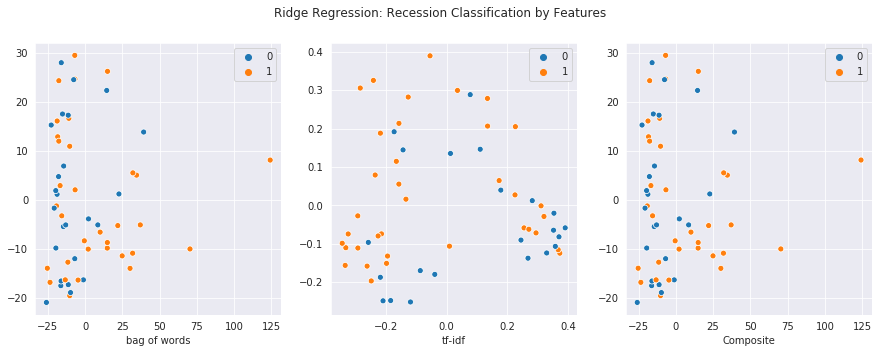

In [20]:
pred_bow = ridge.fit(Data_bow, df_prez['recession']).predict(Data_bow)
pred_tfidf = ridge.fit(Data_tfidf, df_prez['recession']).predict(Data_tfidf)
pred_data = ridge.fit(Data, df_prez['recession']).predict(Data)
labels_list = [pred_bow, pred_tfidf, pred_data]

plotting_func(labels_list, data_list, 3, "Ridge Regression: Recession")

#### Random Forest

In [21]:
#from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
df_desc = df_desc.append(pd.DataFrame([["recession", "bag of words", "random forest"]],
                                      columns=["target", "features", "model"]),
                        ignore_index=True)
print("Target: {}\nFeatures: {}\nModel: {}\n".format(
    df_desc["target"].iloc[-1], df_desc["features"].iloc[-1], df_desc["model"].iloc[-1]))
df_score = df_score.append(supervised_clf(model=rfc,
                                          data=Data_bow,
                                          target=df_prez['recession'],
                                          stratify=df_prez['recession']),
                          ignore_index=True)

Target: recession
Features: bag of words
Model: random forest


Training score: 1.0

Validation score: 0.6666666666666666

Cross validation: 56.8182 +/- 0.3122%


In [22]:
df_desc = df_desc.append(pd.DataFrame([["recession", "tf-idf", "random forest"]],
                                      columns=["target", "features", "model"]),
                        ignore_index=True)
print("Target: {}\nFeatures: {}\nModel: {}\n".format(
    df_desc["target"].iloc[-1], df_desc["features"].iloc[-1], df_desc["model"].iloc[-1]))
df_score = df_score.append(supervised_clf(model=rfc,
                                          data=Data_tfidf,
                                          target=df_prez['recession'],
                                          stratify=df_prez['recession']),
                          ignore_index=True)

Target: recession
Features: tf-idf
Model: random forest


Training score: 1.0

Validation score: 0.6

Cross validation: 53.4848 +/- 0.7084%


In [23]:
df_desc = df_desc.append(pd.DataFrame([["recession", "composite", "random forest"]],
                                      columns=["target", "features", "model"]),
                        ignore_index=True)
print("Target: {}\nFeatures: {}\nModel: {}\n".format(
    df_desc["target"].iloc[-1], df_desc["features"].iloc[-1], df_desc["model"].iloc[-1]))
df_score = df_score.append(supervised_clf(model=rfc,
                                          data=Data,
                                          target=df_prez['recession'],
                                          stratify=df_prez['recession']),
                          ignore_index=True)

Target: recession
Features: composite
Model: random forest


Training score: 1.0

Validation score: 0.7333333333333333

Cross validation: 56.9697 +/- 1.4219%


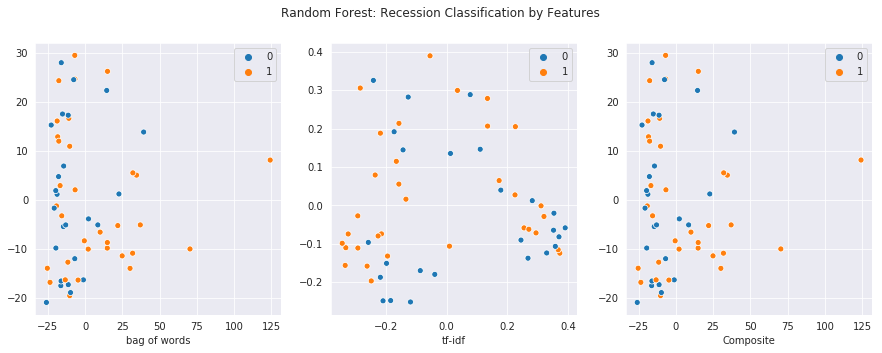

In [24]:
pred_bow = rfc.fit(Data_bow, df_prez['recession']).predict(Data_bow)
pred_tfidf = rfc.fit(Data_tfidf, df_prez['recession']).predict(Data_tfidf)
pred_data = rfc.fit(Data, df_prez['recession']).predict(Data)
labels_list = [pred_bow, pred_tfidf, pred_data]

plotting_func(labels_list, data_list, 3, "Random Forest: Recession")

#### Support Vector Machines

In [25]:
#from sklearn.svm import SVC
# set gamma to 'scale'
svc = SVC(gamma='scale', random_state=42)
df_desc = df_desc.append(pd.DataFrame([["recession", "bag of words", "svm"]],
                                      columns=["target", "features", "model"]),
                        ignore_index=True)
print("Target: {}\nFeatures: {}\nModel: {}\n".format(
    df_desc["target"].iloc[-1], df_desc["features"].iloc[-1], df_desc["model"].iloc[-1]))
df_score = df_score.append(supervised_clf(model=svc,
                                          data=Data_bow,
                                          target=df_prez['recession'],
                                          stratify=df_prez['recession']),
                          ignore_index=True)

Target: recession
Features: bag of words
Model: svm


Training score: 0.8604651162790697

Validation score: 0.6

Cross validation: 58.6364 +/- 1.023%


In [26]:
df_desc = df_desc.append(pd.DataFrame([["recession", "tf-idf", "svm"]],
                                      columns=["target", "features", "model"]),
                        ignore_index=True)
print("Target: {}\nFeatures: {}\nModel: {}\n".format(
    df_desc["target"].iloc[-1], df_desc["features"].iloc[-1], df_desc["model"].iloc[-1]))
df_score = df_score.append(supervised_clf(model=svc,
                                          data=Data_tfidf,
                                          target=df_prez['recession'],
                                          stratify=df_prez['recession']),
                          ignore_index=True)

Target: recession
Features: tf-idf
Model: svm


Training score: 1.0

Validation score: 0.6

Cross validation: 56.8182 +/- 0.0344%


In [27]:
df_desc = df_desc.append(pd.DataFrame([["recession", "composite", "svm"]],
                                      columns=["target", "features", "model"]),
                        ignore_index=True)
print("Target: {}\nFeatures: {}\nModel: {}\n".format(
    df_desc["target"].iloc[-1], df_desc["features"].iloc[-1], df_desc["model"].iloc[-1]))
df_score = df_score.append(supervised_clf(model=svc,
                                          data=Data,
                                          target=df_prez['recession'],
                                          stratify=df_prez['recession']),
                          ignore_index=True)

Target: recession
Features: composite
Model: svm


Training score: 0.8604651162790697

Validation score: 0.6

Cross validation: 56.8182 +/- 0.6428%


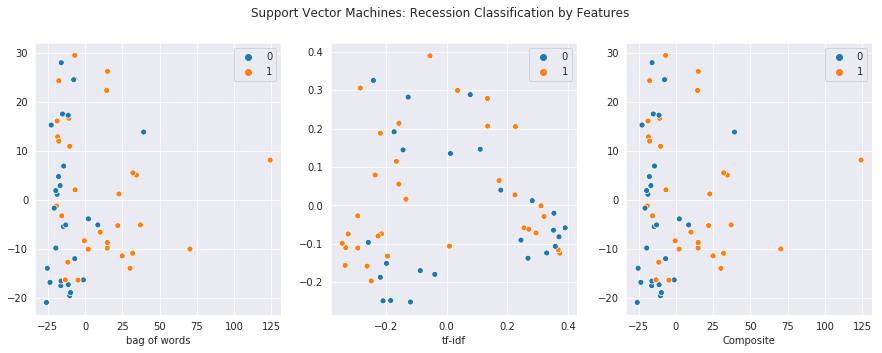

In [28]:
pred_bow = svc.fit(Data_bow, df_prez['recession']).predict(Data_bow)
pred_tfidf = svc.fit(Data_tfidf, df_prez['recession']).predict(Data_tfidf)
pred_data = svc.fit(Data, df_prez['recession']).predict(Data)
labels_list = [pred_bow, pred_tfidf, pred_data]

plotting_func(labels_list, data_list, 3, "Support Vector Machines: Recession")

#### SGD Classifier

In [29]:
#from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
df_desc = df_desc.append(pd.DataFrame([["recession", "bag of words", "sgd"]],
                                      columns=["target", "features", "model"]),
                        ignore_index=True)
print("Target: {}\nFeatures: {}\nModel: {}\n".format(
    df_desc["target"].iloc[-1], df_desc["features"].iloc[-1], df_desc["model"].iloc[-1]))
df_score = df_score.append(supervised_clf(model=sgd,
                                          data=Data_bow,
                                          target=df_prez['recession'],
                                          stratify=df_prez['recession']),
                          ignore_index=True)

Target: recession
Features: bag of words
Model: sgd


Training score: 1.0

Validation score: 0.5333333333333333

Cross validation: 55.1515 +/- 0.4256%


In [30]:
df_desc = df_desc.append(pd.DataFrame([["recession", "tf-idf", "sgd"]],
                                      columns=["target", "features", "model"]),
                        ignore_index=True)
print("Target: {}\nFeatures: {}\nModel: {}\n".format(
    df_desc["target"].iloc[-1], df_desc["features"].iloc[-1], df_desc["model"].iloc[-1]))
df_score = df_score.append(supervised_clf(model=sgd,
                                          data=Data_tfidf,
                                          target=df_prez['recession'],
                                          stratify=df_prez['recession']),
                          ignore_index=True)

Target: recession
Features: tf-idf
Model: sgd


Training score: 1.0

Validation score: 0.5333333333333333

Cross validation: 55.0 +/- 0.2493%


In [31]:
df_desc = df_desc.append(pd.DataFrame([["recession", "composite", "sgd"]],
                                      columns=["target", "features", "model"]),
                        ignore_index=True)
print("Target: {}\nFeatures: {}\nModel: {}\n".format(
    df_desc["target"].iloc[-1], df_desc["features"].iloc[-1], df_desc["model"].iloc[-1]))
df_score = df_score.append(supervised_clf(model=sgd,
                                          data=Data,
                                          target=df_prez['recession'],
                                          stratify=df_prez['recession']),
                          ignore_index=True)

Target: recession
Features: composite
Model: sgd


Training score: 1.0

Validation score: 0.5333333333333333

Cross validation: 56.8182 +/- 0.365%


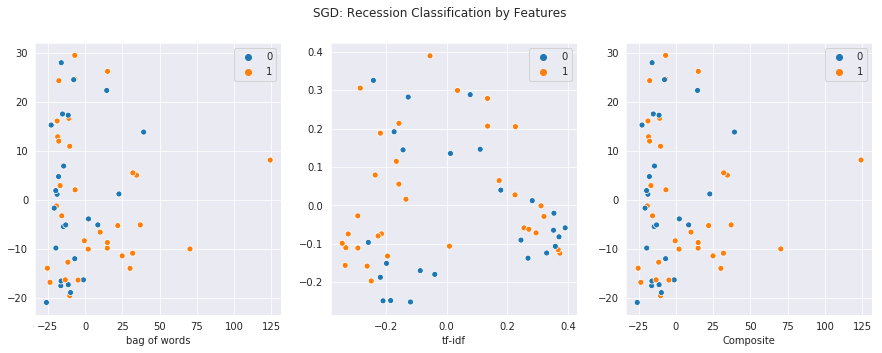

In [32]:
pred_bow = sgd.fit(Data_bow, df_prez['recession']).predict(Data_bow)
pred_tfidf = sgd.fit(Data_tfidf, df_prez['recession']).predict(Data_tfidf)
pred_data = sgd.fit(Data, df_prez['recession']).predict(Data)
labels_list = [pred_bow, pred_tfidf, pred_data]

plotting_func(labels_list, data_list, 3, "SGD: Recession")

### Modeling Wartime

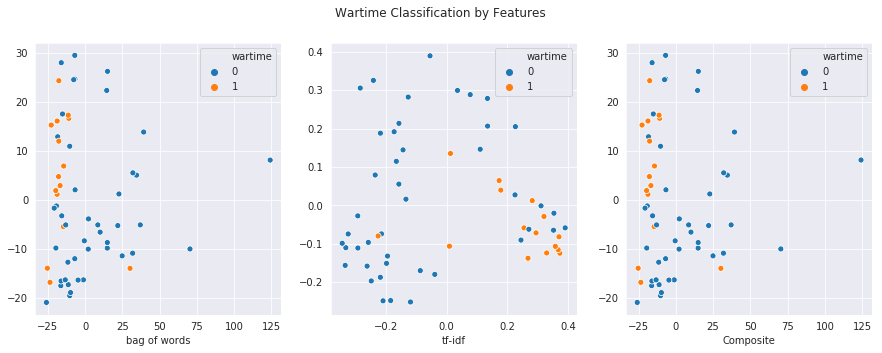

In [33]:
data_list = [bow_2D, tfidf_2D, data_2D]
labels_list = [df_prez['wartime'], df_prez['wartime'], df_prez['wartime']]
# plot wartime target variable
plotting_func(labels_list, data_list, 3, "Wartime")

#### Naive Bayes

In [34]:
#from sklearn.naive_bayes import GaussianNB
bayes = GaussianNB()
df_desc = df_desc.append(pd.DataFrame([["wartime", "bag of words", "naive bayes"]],
                                      columns=["target", "features", "model"]),
                        ignore_index=True)
print("Target: {}\nFeatures: {}\nModel: {}\n".format(
    df_desc["target"].iloc[-1], df_desc["features"].iloc[-1], df_desc["model"].iloc[-1]))
df_score = df_score.append(supervised_clf(model=bayes,
                                          data=Data_bow,
                                          target=df_prez['wartime'],
                                          stratify=df_prez['wartime']),
                          ignore_index=True)

Target: wartime
Features: bag of words
Model: naive bayes


Training score: 1.0

Validation score: 0.8

Cross validation: 72.2727 +/- 0.1942%


In [35]:
df_desc = df_desc.append(pd.DataFrame([["wartime", "tf-idf", "naive bayes"]],
                                      columns=["target", "features", "model"]),
                        ignore_index=True)
print("Target: {}\nFeatures: {}\nModel: {}\n".format(
    df_desc["target"].iloc[-1], df_desc["features"].iloc[-1], df_desc["model"].iloc[-1]))
df_score = df_score.append(supervised_clf(model=bayes,
                                          data=Data_tfidf,
                                          target=df_prez['wartime'],
                                          stratify=df_prez['wartime']),
                          ignore_index=True)

Target: wartime
Features: tf-idf
Model: naive bayes


Training score: 1.0

Validation score: 0.7333333333333333

Cross validation: 72.2727 +/- 0.1942%


In [36]:
df_desc = df_desc.append(pd.DataFrame([["wartime", "composite", "naive bayes"]],
                                      columns=["target", "features", "model"]),
                        ignore_index=True)
print("Target: {}\nFeatures: {}\nModel: {}\n".format(
    df_desc["target"].iloc[-1], df_desc["features"].iloc[-1], df_desc["model"].iloc[-1]))
df_score = df_score.append(supervised_clf(model=bayes,
                                          data=Data,
                                          target=df_prez['wartime'],
                                          stratify=df_prez['wartime']),
                          ignore_index=True)

Target: wartime
Features: composite
Model: naive bayes


Training score: 1.0

Validation score: 0.8

Cross validation: 72.2727 +/- 0.1942%


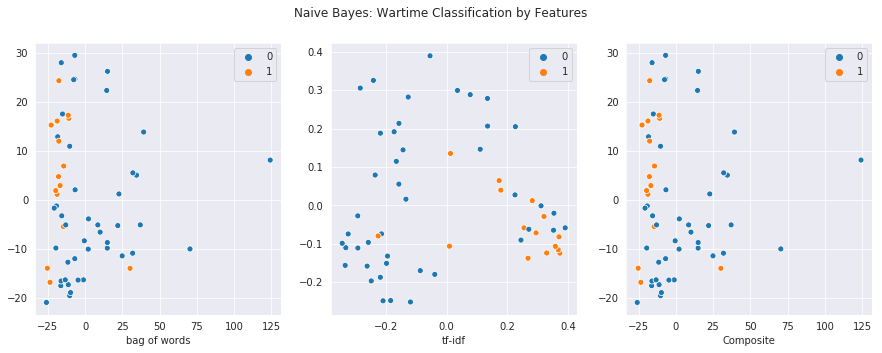

In [37]:
pred_bow = bayes.fit(Data_bow, df_prez['wartime']).predict(Data_bow)
pred_tfidf = bayes.fit(Data_tfidf, df_prez['wartime']).predict(Data_tfidf)
pred_data = bayes.fit(Data, df_prez['wartime']).predict(Data)
labels_list = [pred_bow, pred_tfidf, pred_data]

plotting_func(labels_list, data_list, 3, "Naive Bayes: Wartime")

#### L1 Regularization

In [38]:
#from sklearn.linear_model import LogisticRegression
# set penalty to 'l1'
# set penalty to 'saga'
lasso = LogisticRegression(penalty='l1',
                           solver='saga',
                           multi_class='auto',
                           random_state=42,
                           #max_iter=1500
                          )
df_desc = df_desc.append(pd.DataFrame([["wartime", "bag of words", "lasso regression"]],
                                      columns=["target", "features", "model"]),
                        ignore_index=True)
print("Target: {}\nFeatures: {}\nModel: {}\n".format(
    df_desc["target"].iloc[-1], df_desc["features"].iloc[-1], df_desc["model"].iloc[-1]))
df_score = df_score.append(supervised_clf(model=lasso,
                                          data=Data_bow,
                                          target=df_prez['wartime'],
                                          stratify=df_prez['wartime']),
                          ignore_index=True)

Target: wartime
Features: bag of words
Model: lasso regression



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)



Training score: 1.0

Validation score: 0.8666666666666667


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)



Cross validation: 75.303 +/- 3.9109%


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [39]:
df_desc = df_desc.append(pd.DataFrame([["wartime", "tf-idf", "lasso regression"]],
                                      columns=["target", "features", "model"]),
                        ignore_index=True)
print("Target: {}\nFeatures: {}\nModel: {}\n".format(
    df_desc["target"].iloc[-1], df_desc["features"].iloc[-1], df_desc["model"].iloc[-1]))
df_score = df_score.append(supervised_clf(model=lasso,
                                          data=Data_tfidf,
                                          target=df_prez['wartime'],
                                          stratify=df_prez['wartime']),
                          ignore_index=True)

Target: wartime
Features: tf-idf
Model: lasso regression


Training score: 0.7441860465116279

Validation score: 0.7333333333333333

Cross validation: 74.0909 +/- 0.0124%


In [40]:
df_desc = df_desc.append(pd.DataFrame([["wartime", "composite", "lasso regression"]],
                                      columns=["target", "features", "model"]),
                        ignore_index=True)
print("Target: {}\nFeatures: {}\nModel: {}\n".format(
    df_desc["target"].iloc[-1], df_desc["features"].iloc[-1], df_desc["model"].iloc[-1]))
df_score = df_score.append(supervised_clf(model=lasso,
                                          data=Data,
                                          target=df_prez['wartime'],
                                          stratify=df_prez['wartime']),
                          ignore_index=True)

Target: wartime
Features: composite
Model: lasso regression



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)



Training score: 1.0

Validation score: 0.8666666666666667


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)



Cross validation: 75.303 +/- 3.9109%


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


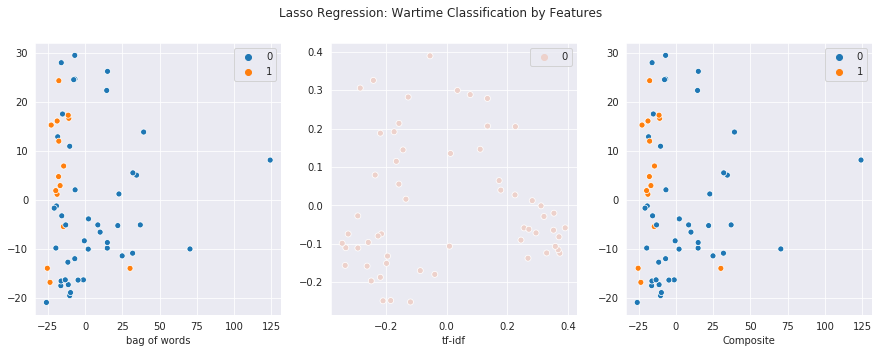

In [41]:
pred_bow = lasso.fit(Data_bow, df_prez['wartime']).predict(Data_bow)
pred_tfidf = lasso.fit(Data_tfidf, df_prez['wartime']).predict(Data_tfidf)
pred_data = lasso.fit(Data, df_prez['wartime']).predict(Data)
labels_list = [pred_bow, pred_tfidf, pred_data]

plotting_func(labels_list, data_list, 3, "Lasso Regression: Wartime")

#### L2 Regularization

In [42]:
#from sklearn.linear_model import LogisticRegression
# set penalty to 'l2'
# set solver to 'lbfgs'
ridge = LogisticRegression(penalty='l2',
                           solver='lbfgs',
                           #multi_class='multinomial',
                           random_state=42)
df_desc = df_desc.append(pd.DataFrame([["wartime", "bag of words", "ridge regression"]],
                                      columns=["target", "features", "model"]),
                        ignore_index=True)
print("Target: {}\nFeatures: {}\nModel: {}\n".format(
    df_desc["target"].iloc[-1], df_desc["features"].iloc[-1], df_desc["model"].iloc[-1]))
df_score = df_score.append(supervised_clf(model=ridge,
                                          data=Data_bow,
                                          target=df_prez['wartime'],
                                          stratify=df_prez['wartime']),
                          ignore_index=True)

Target: wartime
Features: bag of words
Model: ridge regression


Training score: 1.0

Validation score: 0.8

Cross validation: 73.6364 +/- 2.432%


In [43]:
df_desc = df_desc.append(pd.DataFrame([["wartime", "tf-idf", "ridge regression"]],
                                      columns=["target", "features", "model"]),
                        ignore_index=True)
print("Target: {}\nFeatures: {}\nModel: {}\n".format(
    df_desc["target"].iloc[-1], df_desc["features"].iloc[-1], df_desc["model"].iloc[-1]))
df_score = df_score.append(supervised_clf(model=ridge,
                                          data=Data_tfidf,
                                          target=df_prez['wartime'],
                                          stratify=df_prez['wartime']),
                          ignore_index=True)

Target: wartime
Features: tf-idf
Model: ridge regression


Training score: 0.7441860465116279

Validation score: 0.7333333333333333

Cross validation: 74.0909 +/- 0.0124%


In [44]:
df_desc = df_desc.append(pd.DataFrame([["wartime", "composite", "ridge regression"]],
                                      columns=["target", "features", "model"]),
                        ignore_index=True)
print("Target: {}\nFeatures: {}\nModel: {}\n".format(
    df_desc["target"].iloc[-1], df_desc["features"].iloc[-1], df_desc["model"].iloc[-1]))
df_score = df_score.append(supervised_clf(model=ridge,
                                          data=Data,
                                          target=df_prez['wartime'],
                                          stratify=df_prez['wartime']),
                          ignore_index=True)

Target: wartime
Features: composite
Model: ridge regression


Training score: 1.0

Validation score: 0.8

Cross validation: 73.6364 +/- 2.432%


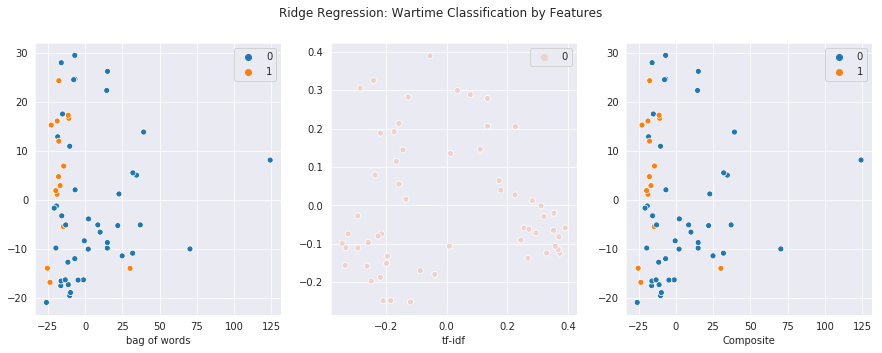

In [45]:
pred_bow = ridge.fit(Data_bow, df_prez['wartime']).predict(Data_bow)
pred_tfidf = ridge.fit(Data_tfidf, df_prez['wartime']).predict(Data_tfidf)
pred_data = ridge.fit(Data, df_prez['wartime']).predict(Data)
labels_list = [pred_bow, pred_tfidf, pred_data]

plotting_func(labels_list, data_list, 3, "Ridge Regression: Wartime")

#### Random Forest

In [46]:
#from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
df_desc = df_desc.append(pd.DataFrame([["wartime", "bag of words", "random forest"]],
                                      columns=["target", "features", "model"]),
                        ignore_index=True)
print("Target: {}\nFeatures: {}\nModel: {}\n".format(
    df_desc["target"].iloc[-1], df_desc["features"].iloc[-1], df_desc["model"].iloc[-1]))
df_score = df_score.append(supervised_clf(model=rfc,
                                          data=Data_bow,
                                          target=df_prez['wartime'],
                                          stratify=df_prez['wartime']),
                          ignore_index=True)

Target: wartime
Features: bag of words
Model: random forest


Training score: 1.0

Validation score: 0.7333333333333333

Cross validation: 72.2727 +/- 0.1942%


In [47]:
df_desc = df_desc.append(pd.DataFrame([["wartime", "tf-idf", "random forest"]],
                                      columns=["target", "features", "model"]),
                        ignore_index=True)
print("Target: {}\nFeatures: {}\nModel: {}\n".format(
    df_desc["target"].iloc[-1], df_desc["features"].iloc[-1], df_desc["model"].iloc[-1]))
df_score = df_score.append(supervised_clf(model=rfc,
                                          data=Data_tfidf,
                                          target=df_prez['wartime'],
                                          stratify=df_prez['wartime']),
                          ignore_index=True)

Target: wartime
Features: tf-idf
Model: random forest


Training score: 1.0

Validation score: 0.8

Cross validation: 74.0909 +/- 0.0124%


In [48]:
df_desc = df_desc.append(pd.DataFrame([["wartime", "composite", "random forest"]],
                                      columns=["target", "features", "model"]),
                        ignore_index=True)
print("Target: {}\nFeatures: {}\nModel: {}\n".format(
    df_desc["target"].iloc[-1], df_desc["features"].iloc[-1], df_desc["model"].iloc[-1]))
df_score = df_score.append(supervised_clf(model=rfc,
                                          data=Data,
                                          target=df_prez['wartime'],
                                          stratify=df_prez['wartime']),
                          ignore_index=True)

Target: wartime
Features: composite
Model: random forest


Training score: 1.0

Validation score: 0.7333333333333333

Cross validation: 72.2727 +/- 0.1942%


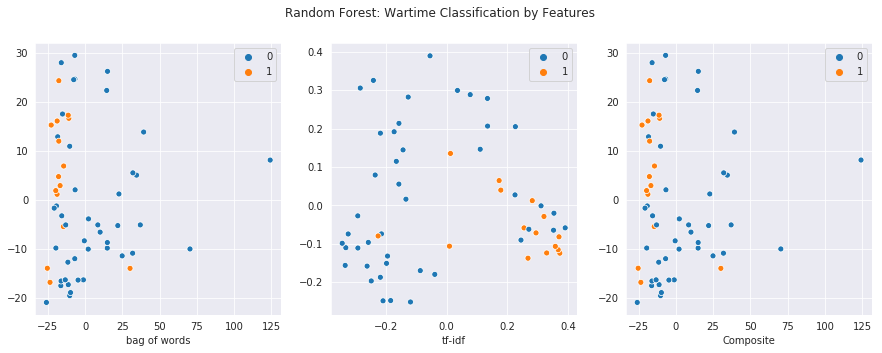

In [49]:
pred_bow = rfc.fit(Data_bow, df_prez['wartime']).predict(Data_bow)
pred_tfidf = rfc.fit(Data_tfidf, df_prez['wartime']).predict(Data_tfidf)
pred_data = rfc.fit(Data, df_prez['wartime']).predict(Data)
labels_list = [pred_bow, pred_tfidf, pred_data]

plotting_func(labels_list, data_list, 3, "Random Forest: Wartime")

#### Support Vector Machines

In [50]:
#from sklearn.svm import SVC
# set gamma to 'scale'
svc = SVC(gamma='scale', random_state=42)
df_desc = df_desc.append(pd.DataFrame([["wartime", "bag of words", "svm"]],
                                      columns=["target", "features", "model"]),
                        ignore_index=True)
print("Target: {}\nFeatures: {}\nModel: {}\n".format(
    df_desc["target"].iloc[-1], df_desc["features"].iloc[-1], df_desc["model"].iloc[-1]))
df_score = df_score.append(supervised_clf(model=svc,
                                          data=Data_bow,
                                          target=df_prez['wartime'],
                                          stratify=df_prez['wartime']),
                          ignore_index=True)

Target: wartime
Features: bag of words
Model: svm


Training score: 0.8604651162790697

Validation score: 0.7333333333333333

Cross validation: 72.2727 +/- 0.1942%


In [51]:
df_desc = df_desc.append(pd.DataFrame([["wartime", "tf-idf", "svm"]],
                                      columns=["target", "features", "model"]),
                        ignore_index=True)
print("Target: {}\nFeatures: {}\nModel: {}\n".format(
    df_desc["target"].iloc[-1], df_desc["features"].iloc[-1], df_desc["model"].iloc[-1]))
df_score = df_score.append(supervised_clf(model=svc,
                                          data=Data_tfidf,
                                          target=df_prez['wartime'],
                                          stratify=df_prez['wartime']),
                          ignore_index=True)

Target: wartime
Features: tf-idf
Model: svm


Training score: 1.0

Validation score: 0.7333333333333333

Cross validation: 74.0909 +/- 0.0124%


In [52]:
df_desc = df_desc.append(pd.DataFrame([["wartime", "composite", "svm"]],
                                      columns=["target", "features", "model"]),
                        ignore_index=True)
print("Target: {}\nFeatures: {}\nModel: {}\n".format(
    df_desc["target"].iloc[-1], df_desc["features"].iloc[-1], df_desc["model"].iloc[-1]))
df_score = df_score.append(supervised_clf(model=svc,
                                          data=Data,
                                          target=df_prez['wartime'],
                                          stratify=df_prez['wartime']),
                          ignore_index=True)

Target: wartime
Features: composite
Model: svm


Training score: 0.8372093023255814

Validation score: 0.7333333333333333

Cross validation: 72.2727 +/- 0.1942%


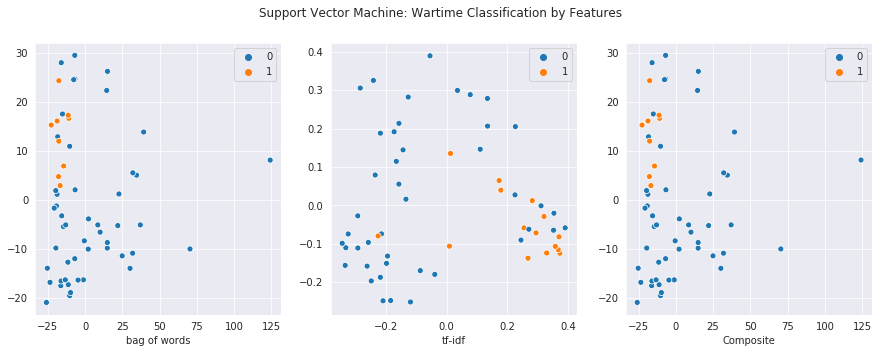

In [53]:
pred_bow = svc.fit(Data_bow, df_prez['wartime']).predict(Data_bow)
pred_tfidf = svc.fit(Data_tfidf, df_prez['wartime']).predict(Data_tfidf)
pred_data = svc.fit(Data, df_prez['wartime']).predict(Data)
labels_list = [pred_bow, pred_tfidf, pred_data]

plotting_func(labels_list, data_list, 3, "Support Vector Machine: Wartime")

#### SGD Classifier

In [54]:
#from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
df_desc = df_desc.append(pd.DataFrame([["wartime", "bag of words", "sgd"]],
                                      columns=["target", "features", "model"]),
                        ignore_index=True)
print("Target: {}\nFeatures: {}\nModel: {}\n".format(
    df_desc["target"].iloc[-1], df_desc["features"].iloc[-1], df_desc["model"].iloc[-1]))
df_score = df_score.append(supervised_clf(model=sgd,
                                          data=Data_bow,
                                          target=df_prez['wartime'],
                                          stratify=df_prez['wartime']),
                          ignore_index=True)

Target: wartime
Features: bag of words
Model: sgd


Training score: 1.0

Validation score: 0.9333333333333333

Cross validation: 70.0 +/- 5.0106%


In [55]:
df_desc = df_desc.append(pd.DataFrame([["wartime", "tf-idf", "sgd"]],
                                      columns=["target", "features", "model"]),
                        ignore_index=True)
print("Target: {}\nFeatures: {}\nModel: {}\n".format(
    df_desc["target"].iloc[-1], df_desc["features"].iloc[-1], df_desc["model"].iloc[-1]))
df_score = df_score.append(supervised_clf(model=sgd,
                                          data=Data_tfidf,
                                          target=df_prez['wartime'],
                                          stratify=df_prez['wartime']),
                          ignore_index=True)

Target: wartime
Features: tf-idf
Model: sgd


Training score: 1.0

Validation score: 0.9333333333333333

Cross validation: 71.6667 +/- 5.2883%


In [56]:
df_desc = df_desc.append(pd.DataFrame([["wartime", "composite", "sgd"]],
                                      columns=["target", "features", "model"]),
                        ignore_index=True)
print("Target: {}\nFeatures: {}\nModel: {}\n".format(
    df_desc["target"].iloc[-1], df_desc["features"].iloc[-1], df_desc["model"].iloc[-1]))
df_score = df_score.append(supervised_clf(model=sgd,
                                          data=Data,
                                          target=df_prez['wartime'],
                                          stratify=df_prez['wartime']),
                          ignore_index=True)

Target: wartime
Features: composite
Model: sgd


Training score: 1.0

Validation score: 0.9333333333333333

Cross validation: 73.7879 +/- 2.1019%


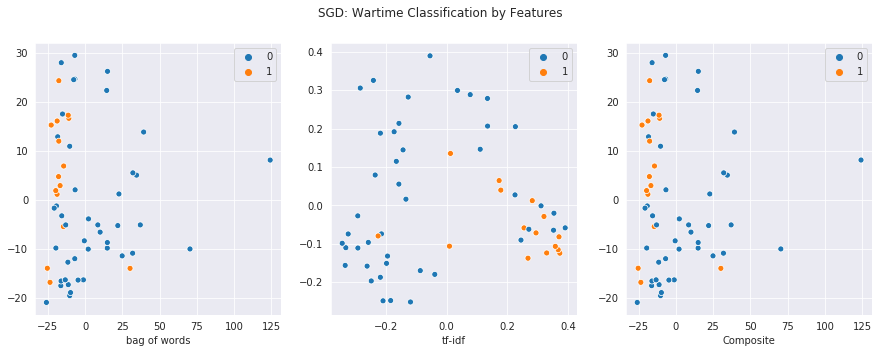

In [57]:
pred_bow = sgd.fit(Data_bow, df_prez['wartime']).predict(Data_bow)
pred_tfidf = sgd.fit(Data_tfidf, df_prez['wartime']).predict(Data_tfidf)
pred_data = sgd.fit(Data, df_prez['wartime']).predict(Data)
labels_list = [pred_bow, pred_tfidf, pred_data]

plotting_func(labels_list, data_list, 3, "SGD: Wartime")

### Analysis

In [59]:
df_score[["cv_score", "variance"]].describe()

,cv_score,variance
count,36.000000,36.000000
mean,64.444444,0.954936
std,8.922825,1.444515
min,51.818200,0.012400
25%,56.818200,0.194200
50%,64.318200,0.249300
75%,72.613625,0.787050
max,75.303000,5.288300


In [61]:
df_test = pd.concat([df_desc, df_score], axis=1)
df_test.sort_values(by=["cv_score"], ascending=False).head(10)

,target,features,model,train_score,test_score,cv_score,variance
23,wartime,composite,lasso regression,1.000000,0.866667,75.3030,3.9109
21,wartime,bag of words,lasso regression,1.000000,0.866667,75.3030,3.9109
31,wartime,tf-idf,svm,1.000000,0.733333,74.0909,0.0124
28,wartime,tf-idf,random forest,1.000000,0.800000,74.0909,0.0124
25,wartime,tf-idf,ridge regression,0.744186,0.733333,74.0909,0.0124
22,wartime,tf-idf,lasso regression,0.744186,0.733333,74.0909,0.0124
35,wartime,composite,sgd,1.000000,0.933333,73.7879,2.1019
26,wartime,composite,ridge regression,1.000000,0.800000,73.6364,2.4320
24,wartime,bag of words,ridge regression,1.000000,0.800000,73.6364,2.4320
19,wartime,tf-idf,naive bayes,1.000000,0.733333,72.2727,0.1942


## Supervised/Unsupervised Model Assessment
None of the unsupervised models demonstrated accurate clustering ability, with Spectral Clustering failing outright.
All of the clustering models seemed to focus around target group 3, the inaugural addresses of modern presidents. The models seem to at least be able to differentiate modern presidential speeches from those of World Ward 2, Civil War, and early presidents. The all around strongest model was K-Means trained on the Bag of Words features. The model had a consistent and (relatively) high silhouette score compared to the other unsupervised models.

The supervised models for the most part exhibited overfitting with lackluster classification performance in the 60-70% accuracy range. The most accurate model was the Ridge Regression trained on the Tf-Idf features. The model demonstrated very high classification accuracy and cross validation score, though it also did have a high variance compared to the other supervised models.

With some tuning we should expect model performance to improve accross the supervised and unsupervised models.